In [51]:
# import nessary module into the jupyter notebook  
import os
import pandas as pd
import seaborn as sn 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm
from imblearn.combine import SMOTEENN

## IMPORTING DATASET

In [52]:
# importing the promotion dataset
prom_data = pd.read_csv('promotion_dataset.csv')

# printing the first 5 rows
prom_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [53]:
# visualizing data set colums, null value and each 
# attribute datatype... 
# its simple reveal that some colums missing values 
# such as the 'eduction', and 'previous year rating'

In [54]:
prom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


### SHOW UNIQUE VALUE IN EACH COLUMNS

In [55]:
# TO KNOW HOW MANY VALUE ARE IN EACH FEATURES
data_feature_diction = {
    'feature' :[], 
    'unique_val': [],
    'val_length':[]
 }
for i in range(len(prom_data.columns)):
    d = prom_data[prom_data.columns[i]].unique()
    # print(f'{prom_data.columns[i]} {d}')
    data_feature_diction['feature'].append(prom_data.columns[i])
    data_feature_diction['unique_val'].append(d)
    data_feature_diction['val_length'].append(len(d))
    
# showing it in a dataframe format  
pd.DataFrame(data_feature_diction)

,feature,unique_val,val_length
0,employee_id,"[65438, 65141, 7513, 2542, 48945, 58896, 20379...",54808
1,department,"[Sales & Marketing, Operations, Technology, An...",9
2,region,"[region_7, region_22, region_19, region_23, re...",34
3,education,"[Master's & above, Bachelor's, nan, Below Seco...",4
4,gender,"[f, m]",2
5,recruitment_channel,"[sourcing, other, referred]",3
6,no_of_trainings,"[1, 2, 3, 4, 7, 5, 6, 8, 10, 9]",10
7,age,"[35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 3...",41
8,previous_year_rating,"[5.0, 3.0, 1.0, 4.0, nan, 2.0]",6
9,length_of_service,"[8, 4, 7, 10, 2, 5, 6, 1, 3, 16, 9, 11, 26, 12...",35


### Checking for duplicate

In [56]:
# this shows their is no data duplication... 
prom_data.duplicated().value_counts()
prom_data[prom_data.employee_id.duplicated()==True]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted


### Visualizing prediction Class

Text(0.5, 1.0, 'this promotion class count')

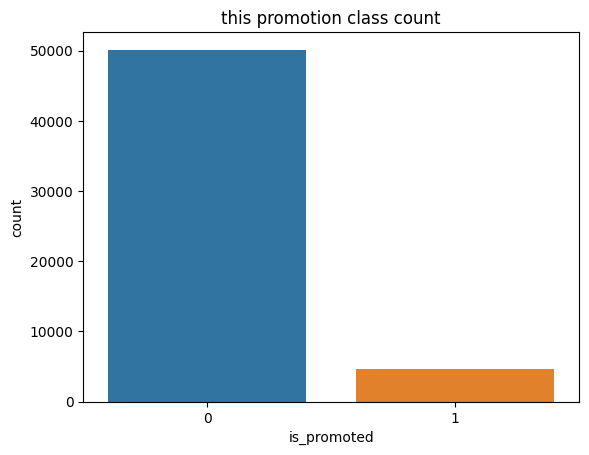

In [57]:
# with the visual its show that the class distribution is highly imbalance
sn.countplot(x=prom_data.is_promoted, data=prom_data)
plt.title('this promotion class count', loc='center')

In [ ]:
Visualizing Sex Distribution

In [65]:
prom_data.gender.value_counts()
# plt.(['male', 'female'])

m    38496
f    16312
Name: gender, dtype: int64

<h1 style='color:black' align='left'> OBSERVING PROMOTION DISTRIBUTION </h1>

In [8]:
# checking the count observation of gender in respect to other attributes...
# with this, the bais disttribution can be clearly seen based on SEX

<Axes: xlabel='is_promoted', ylabel='count'>

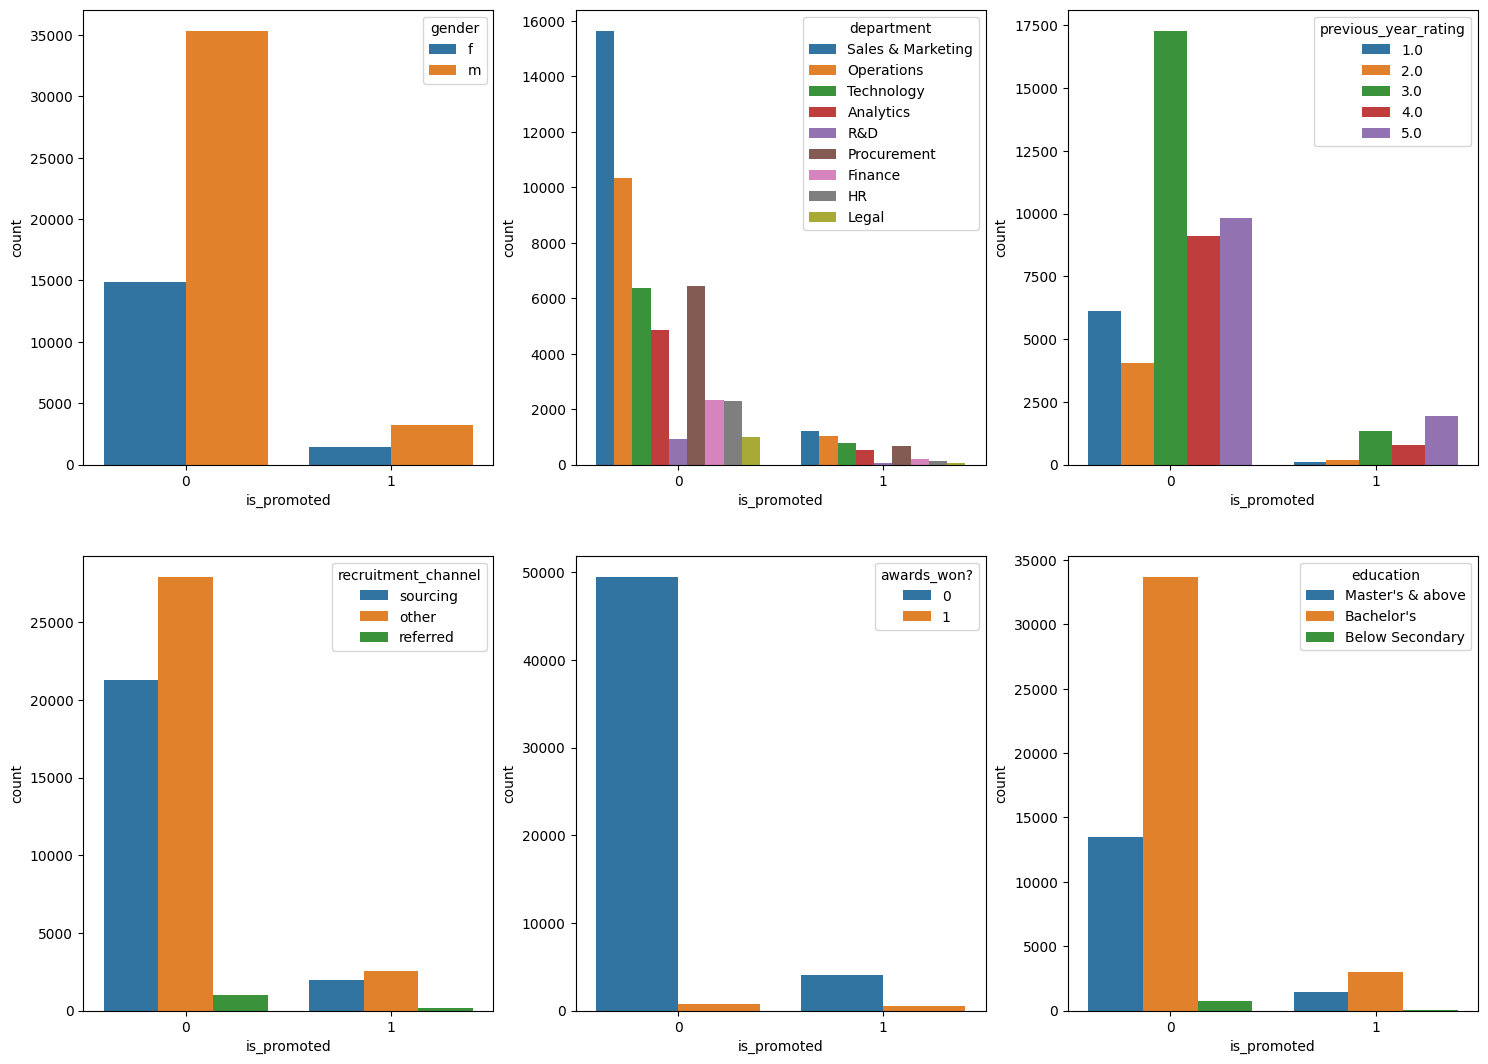

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(18,13))
# plt.figure(figsize=(12,12))
sn.countplot(x='is_promoted', hue='gender',  data=prom_data, ax=ax[0,0])
sn.countplot(x='is_promoted', hue='department',  data=prom_data, ax=ax[0,1])
sn.countplot(x='is_promoted', hue='previous_year_rating',  data=prom_data, ax=ax[0,2])
sn.countplot(x='is_promoted', hue='recruitment_channel',  data=prom_data, ax=ax[1,0])
sn.countplot(x='is_promoted', hue='awards_won?',  data=prom_data, ax=ax[1,1])
sn.countplot(x='is_promoted', hue='education',  data=prom_data, ax=ax[1,2])

### FINDING CORELLATION BETWEEN DATAPOINT

<h3 style='color:black' align='left'>this is essential to reveal how related <br> or the level of correlation between the features </h2>

C:\Users\HP\AppData\Local\Temp\ipykernel_13892\2721570615.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(prom_data.corr(), annot=True )


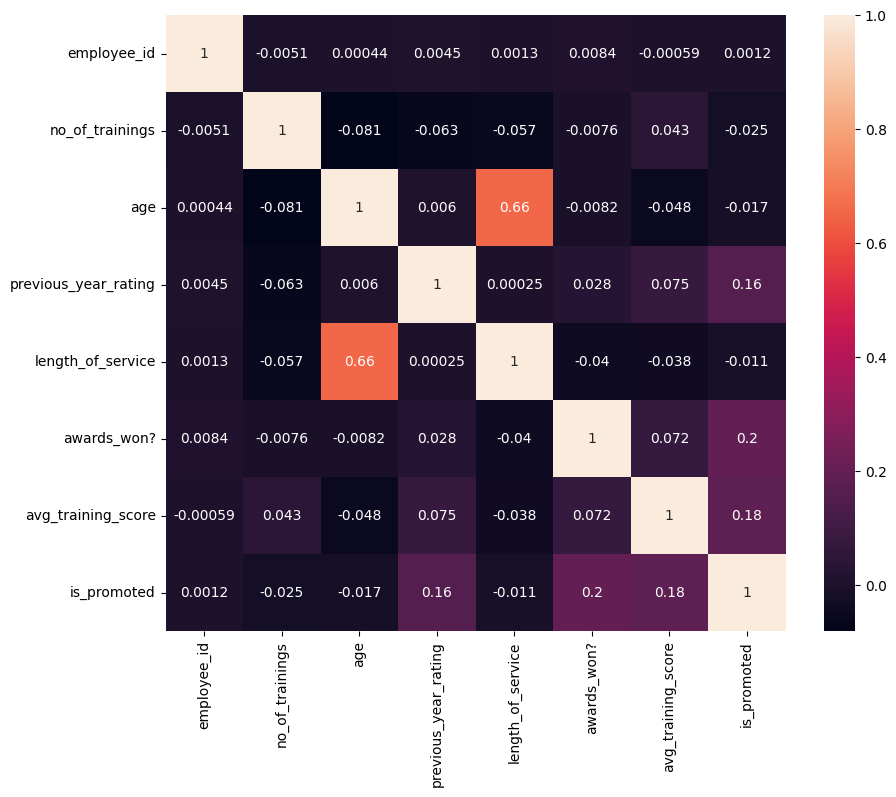

In [10]:
# showing correlation or how related the attribuites his to heach other
# plt.title('DATA CORRELATION')
plt.figure(figsize=(10,8))
sn.heatmap(prom_data.corr(), annot=True )
plt.show()

In [11]:
# age and length of service as 60% correlation let dive down into the data in detail
# form the scatter chat we can actually says the age of the staff could tell the year's 
# he/she as been employed... 

54808
54808


Text(0, 0.5, 'AGE')

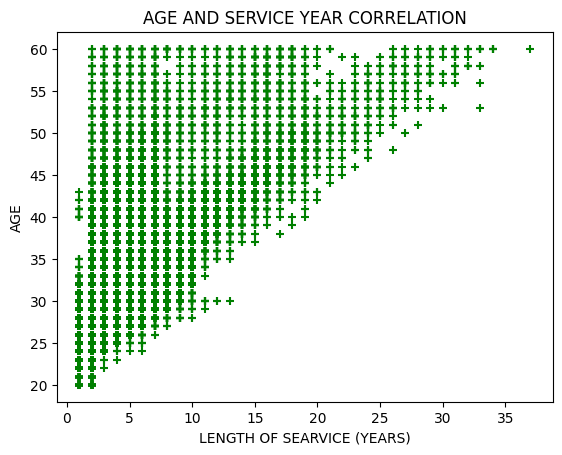

In [12]:
print(prom_data.length_of_service.count())
print(prom_data.age.count())
plt.title('AGE AND SERVICE YEAR CORRELATION')
plt.scatter(prom_data.length_of_service, prom_data.age, color='green', marker='+' )
plt.xlabel('LENGTH OF SEARVICE (YEARS)')
plt.ylabel('AGE')

In [13]:
# loooking into the the lenght of service year 
#  let check if how long you are employes rely determine ur promotion 
# from the correlation table we have -1.1% corellation ... meaning the year of service does not determine 
# if a staff is promoted or not.. and this can be clearning shown in the scartter chart below

54808
54808


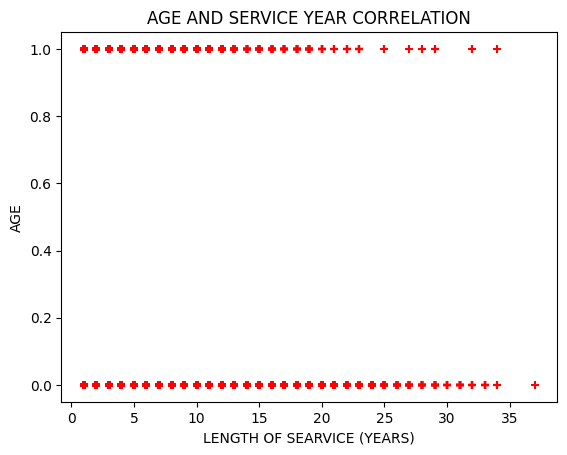

In [14]:
print(prom_data.length_of_service.count())
print(prom_data.age.count())
plt.title('AGE AND SERVICE YEAR CORRELATION')
plt.scatter(prom_data.length_of_service, prom_data.is_promoted, color='red', marker='+' )
plt.xlabel('LENGTH OF SEARVICE (YEARS)')
plt.ylabel('AGE')
plt.show()

<h1 style='color:black' align='left'> DATA CLEANING AND TRASFORMATION </h1>

<h2 style='color:black' align='left'> based on eploration the data set contain missing value <br> hence its 
essential to clean, remove irrelival columns and and fill up missing values <br>
    however trainsforming the data is needed some columns are in text for and machine learning works with numbers... </h2>

<h1 style='color:black' align='left'> Addressing Null Value Data </h1>

In [15]:
#  let loop through the dataset and count the number of missing data point in each features
# this shows that only 'previous year rating' and the 'eductaion' columns contain missing values. 

# we have 2,409 missing value in education feature 
# and 4,124 missing value in previous year rating feature 

prom_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [16]:
# we can see some NaN value in the datapoint of previous year rating feature
# looping through the value to see in detail the content of the feature..... 
prom_data.previous_year_rating.values[:200]

array([ 5.,  5.,  3.,  1.,  3.,  3.,  3.,  3.,  4.,  5., nan,  5.,  5.,
        3.,  3.,  1.,  3.,  1.,  5.,  3.,  3.,  4.,  3., nan,  5.,  5.,
        5.,  4.,  5., nan,  5.,  1.,  1.,  4.,  5.,  2.,  4.,  5.,  5.,
        5.,  3.,  4.,  4.,  2.,  5.,  5.,  4.,  3.,  3.,  3.,  4.,  3.,
        3.,  1.,  3.,  2., nan,  3., nan,  4.,  4.,  3., nan,  4.,  5.,
        3., nan, nan,  4.,  3.,  5.,  5.,  1.,  4.,  3.,  4.,  1.,  4.,
        3.,  3.,  3.,  2.,  3.,  4., nan,  5.,  2.,  1.,  5., nan, nan,
        3.,  4.,  3.,  4.,  4., nan,  3.,  3.,  5.,  5.,  3.,  3.,  5.,
        5.,  4.,  4.,  3.,  3.,  2.,  4., nan,  4.,  3.,  5.,  4.,  5.,
        3.,  4.,  4.,  4.,  5.,  5., nan,  3., nan,  5., nan,  5.,  3.,
        5.,  5.,  4.,  3.,  5., nan,  3.,  3.,  4.,  4.,  3., nan,  5.,
        3.,  3.,  3.,  3.,  5.,  1.,  4.,  3.,  5.,  5.,  4.,  3.,  1.,
        3.,  3.,  5.,  4., nan,  3.,  1.,  5.,  3.,  5.,  1.,  4.,  4.,
        4.,  5.,  1.,  2.,  3.,  3.,  2.,  3.,  2., nan,  5.,  3

In [17]:
# we can see some NaN value in the datapoint of education feature
prom_data.education

0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
               ...       
54803          Bachelor's
54804    Master's & above
54805          Bachelor's
54806                 NaN
54807          Bachelor's
Name: education, Length: 54808, dtype: object

In [18]:
# using linear interpolation approach to fill the missing value for the 'previous_year_rating'
prom_data.previous_year_rating = prom_data.previous_year_rating.interpolate(method='linear')
prom_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [19]:
# using foward fill NaN (null) value method to replace the missin datapoint
prom_data.education.fillna(method='ffill', inplace=True)
prom_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [20]:
prom_data.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0


### droping the employee id (it as no contribution to the machine learning prediction)....

In [21]:
# droping of the employee id 
prom_data.drop(columns=['employee_id'], inplace=True)
prom_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


## Converting object type to categorical type for easy convertion into Numberical Form  

In [22]:
# first five feature as object datatype .. let change to category type for easy encoding
# into numerical form
prom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.0+ MB


In [23]:
# looping throught the first five fueature (those features has text representation.....
# and we need to convert  them to numberic)
prom_data[prom_data.columns[:5]] = prom_data[prom_data.columns[:5]].astype('category')
prom_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [24]:
# first five feature data type converted to category
prom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   department            54808 non-null  category
 1   region                54808 non-null  category
 2   education             54808 non-null  category
 3   gender                54808 non-null  category
 4   recruitment_channel   54808 non-null  category
 5   no_of_trainings       54808 non-null  int64   
 6   age                   54808 non-null  int64   
 7   previous_year_rating  54808 non-null  float64 
 8   length_of_service     54808 non-null  int64   
 9   awards_won?           54808 non-null  int64   
 10  avg_training_score    54808 non-null  int64   
 11  is_promoted           54808 non-null  int64   
dtypes: category(5), float64(1), int64(6)
memory usage: 3.2 MB


In [25]:
# looping throught the features and converting them into numbers
for feature in prom_data.columns[:5]:
    prom_data[feature] = prom_data[feature].cat.codes

In [26]:
# printing two datapoint for confirmation
prom_data.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,60,0


In [27]:
# no missing value and All text data are now numeric.. 
prom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  int8   
 1   region                54808 non-null  int8   
 2   education             54808 non-null  int8   
 3   gender                54808 non-null  int8   
 4   recruitment_channel   54808 non-null  int8   
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), int8(5)
memory usage: 3.2 MB


## DATA SPLITTING

In [28]:
## feature splitting .... extracting the independent feature (X) and dependent feature (Y)
y = prom_data['is_promoted']
X = prom_data.drop(columns=['is_promoted']) # temporarily drop the promotion columns then assign the remaining columns ...

## DATA BALACING 

In [29]:
# GENERATING SYNTHETIC SMAPLES
sm_en = SMOTEENN()
X_resample , y_resample =sm_en.fit_resample(X, y)
y_resample.value_counts()

1    48669
0    34748
Name: is_promoted, dtype: int64

In [30]:
# splitting data into training (80%) and testing set (20%) 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_resample, y_resample, test_size=0.2, random_state=10)

print(f'Train size : {len(X_train)}')
print(f'Test  size : {len(X_test)}')

Train size : 66733
Test  size : 16684


## MODEL TRAINING

### Naive Baye's Machine learning Algorithm with Gender Column

In [31]:
from sklearn import naive_bayes

# trianing the machine learning model using naive bayes algorithm.... 
nb_model = naive_bayes.GaussianNB()
nb_model.fit(X_train, y_train)

# evaluating the model using the testing samples
nb_model.score(X_test, y_test)

0.7186526012946536

In [32]:
# detail evaluation of the model
np_prediction = nb_model.predict(X_test)
acc = metrics.accuracy_score(y_test , np_prediction)
pre = metrics.precision_score(y_test , np_prediction)
rec = metrics.recall_score(y_test , np_prediction)
print('Accuracy of Naive Bayes  _______ {}'.format(metrics.accuracy_score(y_test , np_prediction)))
print('Precission of Naive Bayes ______ {}'.format(metrics.precision_score(y_test , np_prediction)))
print('Recall of Naive Bayes     ______ {}'.format(metrics.recall_score(y_test , np_prediction)))

Accuracy of Naive Bayes  _______ 0.7186526012946536
Precission of Naive Bayes ______ 0.7279773846434434
Recall of Naive Bayes     ______ 0.8234990715906746


In [33]:
# visualizing the classificatin report
cr_report = metrics.classification_report(y_test, np_prediction)
print(cr_report)

              precision    recall  f1-score   support

           0       0.70      0.57      0.63      6990
           1       0.73      0.82      0.77      9694

    accuracy                           0.72     16684
   macro avg       0.71      0.70      0.70     16684
weighted avg       0.72      0.72      0.71     16684



TN = 4007 ---,  FP = 2983 ---,  FN = 1711 ----, TP = 7983


<Axes: >

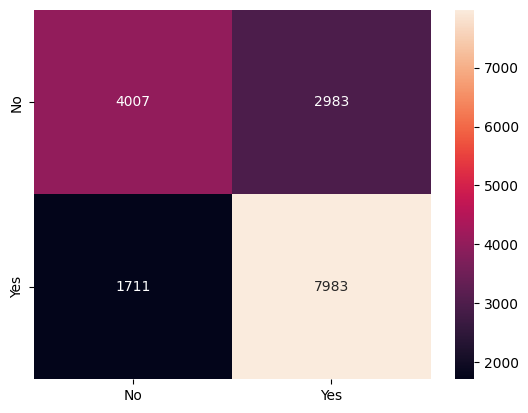

In [34]:
# COMPUTING ACCURACY PRECISION AND RECALL FROM CONFUSION MATRIX
cm_report = metrics.confusion_matrix(y_test, np_prediction)
TN, FP, FN, TP = cm_report.ravel()
print('TN = {} ---,  FP = {} ---,  FN = {} ----, TP = {}'.format(TN, FP, FN, TP))
sn.heatmap(cm_report, annot=True,fmt='d' , xticklabels=['No', 'Yes']  , yticklabels = ['No', 'Yes'])

### Naive Baye's Machine learning Algorithm without Gender Column

In [35]:
# showing two sample from the x train data .... 
X_train.sample(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
25270,7,20,2,1,0,1,31,2.0,3,0,49
55934,0,11,2,1,0,1,34,5.0,3,0,83


In [36]:
# dropping gender column from the X_train and the X_test sample ...
X_train_gender = X_train.drop(columns=['gender'])
X_test_gender = X_test.drop(columns=['gender'])

In [37]:
from sklearn import naive_bayes

# trianing the machine learning model using naive bayes algorithm.... 
nb_model_gb = naive_bayes.GaussianNB()
nb_model_gb.fit(X_train_gender, y_train)

# evaluating the model using the testing samples
nb_model_gb.score(X_test_gender, y_test)

0.7099616398945097

In [38]:
# detail evaluation of the model
np_no_gender_prediction = nb_model_gb.predict(X_test_gender)
acc_without_gender = metrics.accuracy_score(y_test , np_no_gender_prediction)
pre_without_gender = metrics.precision_score(y_test , np_no_gender_prediction)
rec_without_gender = metrics.recall_score(y_test , np_no_gender_prediction)
print('Accuracy of Naive Bayes  _______ {}'.format(metrics.accuracy_score(y_test , np_no_gender_prediction)))
print('Precission of Naive Bayes ______ {}'.format(metrics.precision_score(y_test , np_no_gender_prediction)))
print('Recall of Naive Bayes     ______ {}'.format(metrics.recall_score(y_test , np_no_gender_prediction)))

Accuracy of Naive Bayes  _______ 0.7099616398945097
Precission of Naive Bayes ______ 0.7161428189831716
Recall of Naive Bayes     ______ 0.8296884670930472


              precision    recall  f1-score   support

           0       0.70      0.54      0.61      6990
           1       0.72      0.83      0.77      9694

    accuracy                           0.71     16684
   macro avg       0.71      0.69      0.69     16684
weighted avg       0.71      0.71      0.70     16684

TN = 4007 ---,  FP = 2983 ---,  FN = 1711 ----, TP = 7983


<Axes: >

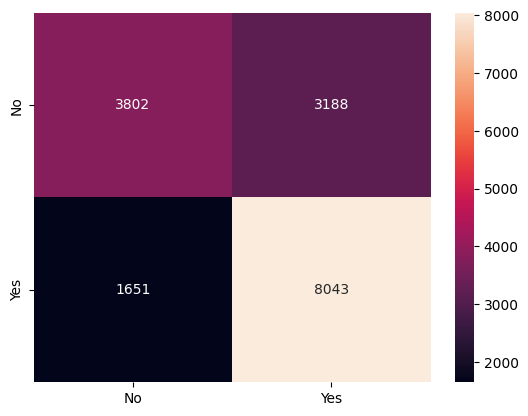

In [39]:
# visualizing the classificatin report
cr_no_gender_report = metrics.classification_report(y_test, np_no_gender_prediction)
print(cr_no_gender_report)

# COMPUTING ACCURACY PRECISION AND RECALL FROM CONFUSION MATRIX
cm_not_gender_report = metrics.confusion_matrix(y_test, np_no_gender_prediction)
TN, FP, FN, TP = cm_report.ravel()
print('TN = {} ---,  FP = {} ---,  FN = {} ----, TP = {}'.format(TN, FP, FN, TP))
sn.heatmap(cm_not_gender_report, annot=True,fmt='d' , xticklabels=['No', 'Yes']  , yticklabels = ['No', 'Yes'])

## GENDER PROTECTED CHARACTERISTIC

In [40]:
# Extracting Gender as the protected attribut
PROTECTED = 'gender' 
MALE   = 1  
FEMALE = 0 

# accessing the index of  MALE the X_test dataframe 
male_index = np.where(X_test[PROTECTED] == MALE)[0]
# accessing the index of  MALE the X_test dataframe 
female_index = np.where(X_test[PROTECTED] == FEMALE)[0]

# PRINT THE INDEX OR LOCATION OF MALE AND FEMALE IN THE DATA FRAME
print('Male indies :   {} Size {} '.format(male_index, len(male_index)))
print('Female indies : {} Size {}'.format(female_index, len(female_index)))

Male indies :   [    2     3     4 ... 16678 16681 16683] Size 9889 
Female indies : [    0     1     5 ... 16679 16680 16682] Size 6795


In [41]:
# using the male index to collect value map to male in y_test 
y_test_male = [y_test.values[index] for index in male_index]

# using the female index to collect value map to female in y_test 
y_test_female = [y_test.values[index] for index in female_index]

In [42]:
# accessing the the male and female index prediction make by the
# machine leanring algorithm.. 
y_male_prediction = [np_prediction[index] for index in male_index]
y_female_prediction = [np_prediction[index] for index in female_index]

## MALE

      CLASSIFICATION REPORT & CONFUSION MATRIX FOR MALE
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      4924
           1       0.68      0.74      0.71      4965

    accuracy                           0.70      9889
   macro avg       0.70      0.70      0.69      9889
weighted avg       0.70      0.70      0.69      9889

TN = 3182 ---,  FP = 1742 ---,  FN = 1271 ----, TP = 3694


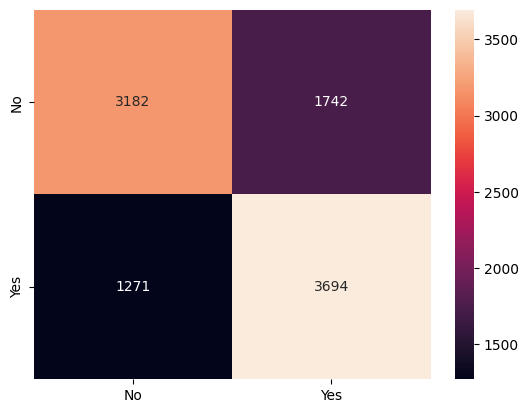

In [43]:
print('      CLASSIFICATION REPORT & CONFUSION MATRIX FOR MALE')
print('-------------------------------------------------------------')
cr_male = metrics.classification_report(y_test_male, y_male_prediction)
print(cr_male)

# COMPUTING ACCURACY PRECISION AND RECALL FROM CONFUSION MATRIX
cm_male_report = metrics.confusion_matrix(y_test_male, y_male_prediction)
TN, FP, FN, TP = cm_male_report.ravel()
print('TN = {} ---,  FP = {} ---,  FN = {} ----, TP = {}'.format(TN, FP, FN, TP))
sn.heatmap(cm_male_report, annot=True , fmt='d',  xticklabels=['No', 'Yes']  , yticklabels = ['No', 'Yes'])
plt.show()

In [44]:
# detail evaluation of the model base on GENDER == Male
# accuracy, precission and recall metrics
acc_male = metrics.accuracy_score(y_test_male , y_male_prediction)
pre_male = metrics.precision_score(y_test_male , y_male_prediction)
rec_male = metrics.recall_score(y_test_male , y_male_prediction)
print('Accuracy of Naive Bayes  _______ {}'.format(metrics.accuracy_score(y_test_male, y_male_prediction)))
print('Precission of Naive Bayes ______ {}'.format(metrics.precision_score(y_test_male, y_male_prediction)))
print('Recall of Naive Bayes     ______ {}'.format(metrics.recall_score(y_test_male, y_male_prediction)))

Accuracy of Naive Bayes  _______ 0.6953180301344929
Precission of Naive Bayes ______ 0.6795437821927888
Recall of Naive Bayes     ______ 0.7440080563947633


## FEMALE

      CLASSIFICATION REPORT & CONFUSION MATRIX FOR FEMALE
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.40      0.50      2066
           1       0.78      0.91      0.84      4729

    accuracy                           0.75      6795
   macro avg       0.71      0.65      0.67      6795
weighted avg       0.74      0.75      0.73      6795

TN = 3182 ---,  FP = 1742 ---,  FN = 1271 ----, TP = 3694


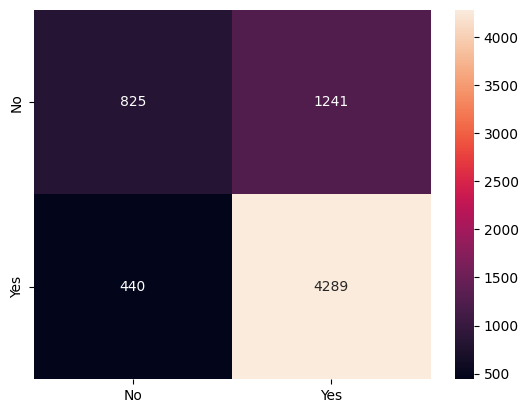

In [45]:
print('      CLASSIFICATION REPORT & CONFUSION MATRIX FOR FEMALE')
print('-------------------------------------------------------------')
# classification report
cr_female = metrics.classification_report(y_test_female, y_female_prediction)
print(cr_female)

# COMPUTING ACCURACY PRECISION AND RECALL FROM CONFUSION MATRIX
cm_female_report = metrics.confusion_matrix(y_test_female, y_female_prediction)
TN, FP, FN, TP = cm_male_report.ravel()
print('TN = {} ---,  FP = {} ---,  FN = {} ----, TP = {}'.format(TN, FP, FN, TP))
sn.heatmap(cm_female_report, annot=True , fmt='d',  xticklabels=['No', 'Yes']  , yticklabels = ['No', 'Yes'])
plt.show()

In [46]:
# detail evaluation of the model base on GENDER == female
# accuracy, precission and recall metrics
acc_female = metrics.accuracy_score(y_test_female , y_female_prediction)
pre_female = metrics.precision_score(y_test_female , y_female_prediction)
rec_female = metrics.recall_score(y_test_female , y_female_prediction)
print('Accuracy of Naive Bayes  _______ {}'.format(metrics.accuracy_score(y_test_female, y_female_prediction)))
print('Precission of Naive Bayes ______ {}'.format(metrics.precision_score(y_test_female, y_female_prediction)))
print('Recall of Naive Bayes     ______ {}'.format(metrics.recall_score(y_test_female, y_female_prediction)))

Accuracy of Naive Bayes  _______ 0.7526122148638705
Precission of Naive Bayes ______ 0.7755877034358047
Recall of Naive Bayes     ______ 0.9069570733770353


## Summary Result

In [47]:
# RESULT SUMMARY
result_diction = {
    'accuracy': [acc, acc_without_gender, acc_male, acc_female], 
    'precision': [pre, pre_without_gender, pre_male, pre_female], 
    'recall': [rec, rec_without_gender, rec_male, rec_female]
}

result_summary = pd.DataFrame(result_diction, index=['Model_with_gender','Model_without_gender', 'male', 'female'])
result_summary

,accuracy,precision,recall
Model_with_gender,0.718653,0.727977,0.823499
Model_without_gender,0.709962,0.716143,0.829688
male,0.695318,0.679544,0.744008
female,0.752612,0.775588,0.906957


## SAVE MODEL FOR USING JOBLIB

In [48]:
import joblib

# saving model into local disk
joblib.dump(nb_model_gb, 'navie_bayes_model.jb')

['navie_bayes_model.jb']

Loadding Model 

In [49]:
nb_model_load = joblib.load('navie_bayes_model.jb')
nb_model_load

GaussianNB()

In [ ]:
# Naive Bayes Algorithm
nb = GaussianNB()
nb_report2 = model_prediction_and_report(nb, X_train, y_train, X_test, y_test)

list(nb_report2.keys())[:-2]
for key  in list(nb_report2.keys())[:-4]: 
    print(f'{" ".join(key.split("_"))}  ===>  {nb_report2[key]}')

print(nb_report2['report'])

sn.heatmap(nb_report2['matrix'], annot=True, xticklabels=level_mapper.keys(), yticklabels=level_mapper.keys())

In [ ]:
y_male_prediction = [svm_report1['prediction'][index] for index in male_indices]
y_female_prediction = [svm_report1['prediction'][index] for index in female_indices]
# extraction for Naive Bayes 
y_male_prediction_nb = [nb_report1['prediction'][index] for index in male_indices]
y_female_prediction_nb = [nb_report1['prediction'][index] for index in female_indices]

In [ ]:
print('      CLASSIFICATION REPORT & CONFUSION MATRIX FOR SVM - MALE')
print('-------------------------------------------------------------')
cr_male = metrics.classification_report(y_test_male, y_male_prediction)
print(cr_male)

# COMPUTING ACCURACY PRECISION AND RECALL FROM CONFUSION MATRIX
cm_male_report = metrics.confusion_matrix(y_test_male, y_male_prediction)
TN1, FP1, FP2, FN1, TN2, FN2, FN3, FN4, TN3 = cm_male_report.ravel()

# Print the metrics and values
print('TN = {} ---,  FP = {} ---,  FN = {} ----, TP = {}'.format(TN1, FP1, FN1, TN2))
print('TN = {} ---,  FP = {} ---,  FN = {} ----, TP = {}'.format(TN2, FP2, FN2, TN3))
print('TN = {} ---,  FP = {} ---,  FN = {} ----, TP = {}'.format(TN3, FP1, FN3, TN1))


# accuracy, precision and recall diction 
acc_pre_re_diction = {'model':[], 'acc':[], 'pre':[], 'rec':[] }
acc_male = metrics.accuracy_score(y_test_male , y_male_prediction)
pre_male = metrics.precision_score(y_test_male , y_male_prediction, average='weighted')
rec_male = metrics.recall_score(y_test_male , y_male_prediction, average='weighted')
acc_pre_re_diction['model'].append('SVM-MALE')
acc_pre_re_diction['acc'].append(acc_male)
acc_pre_re_diction['pre'].append(pre_male)
acc_pre_re_diction['rec'].append(rec_male)

sn.heatmap(cm_male_report, annot=True, xticklabels=level_mapper.keys(), yticklabels=level_mapper.keys())

In [ ]:
print('      CLASSIFICATION REPORT & CONFUSION MATRIX FOR SVM - FEMALE')
print('-------------------------------------------------------------')
cr_female = metrics.classification_report(y_test_female, y_female_prediction)
print(cr_female)

# COMPUTING ACCURACY PRECISION AND RECALL FROM CONFUSION MATRIX
cm_female_report = metrics.confusion_matrix(y_test_female, y_female_prediction)
TN1, FP1, FP2, FN1, TN2, FN2, FN3, FN4, TN3 = cm_female_report.ravel()

# Print the metrics and values
print('TN = {} ---,  FP = {} ---,  FN = {} ----, TP = {}'.format(TN1, FP1, FN1, TN2))
print('TN = {} ---,  FP = {} ---,  FN = {} ----, TP = {}'.format(TN2, FP2, FN2, TN3))
print('TN = {} ---,  FP = {} ---,  FN = {} ----, TP = {}'.format(TN3, FP1, FN3, TN1))

# COLLECTING ACCURACY PRECISION AND RECALL
acc_female = metrics.accuracy_score(y_test_female , y_female_prediction)
pre_female = metrics.precision_score(y_test_female , y_female_prediction, average='weighted')
rec_female = metrics.recall_score(y_test_female , y_female_prediction, average='weighted')
acc_pre_re_diction['model'].append('SVM-FEMALE')
acc_pre_re_diction['acc'].append(acc_female)
acc_pre_re_diction['pre'].append(pre_female)
acc_pre_re_diction['rec'].append(rec_female)

# SHOWING THE CONFUSION MATRIX
sn.heatmap(cm_female_report, annot=True, xticklabels=level_mapper.keys(), yticklabels=level_mapper.keys())

In [ ]:
svm_protected_result2 = pd.DataFrame(acc_pre_re_diction)
svm_protected_result2